In [1]:
from car_part import CarPartDataset, CarPartConfig, prepare_datasets, preprocess_dataset
from pathlib import Path
from mrcnn import visualize
import colorsys
import random
import numpy as np
import mrcnn.model as modellib
from mrcnn.model import log
import scipy.io as sio
import os

import matplotlib.pyplot as plt
plt.ion()

Using TensorFlow backend.


# How to train the model

In [2]:
part_annotation_files = Path(
    '../../../car-damage-estimation/data/car_part/trainval/Annotations_Part/')
images_path = Path('../../../car-damage-estimation/data/VOCdevkit/VOC2010/JPEGImages/')

images_annotations_files = list(Path(part_annotation_files).glob('*.mat'))

## Prepare the datasets

In [ ]:
dataset_train, dataset_val, dataset_test = prepare_datasets(images_path, images_annotations_files, 0.9, 1.0)

  1%|▏         | 147/10103 [00:02<03:05, 53.71it/s]

list(zip(dataset_train.class_names, dataset_train.class_ids))

In [ ]:
print(dataset_train.num_images, dataset_val.num_images, dataset_test.num_images)

### Check some images

In [7]:
colors = visualize.generate_colormap(30, scaled=False)

In [8]:
i = 2

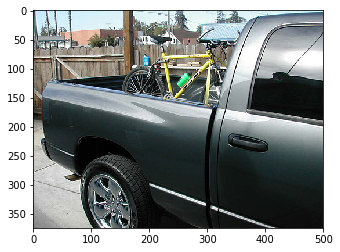

In [9]:
img = dataset_train.load_image(i)
plt.imshow(img)

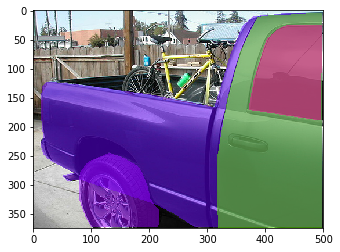

In [12]:
mask, classes = dataset_train.load_mask(i)
img_copy = img.copy()

for l in range(mask.shape[-1]):
    img_copy = visualize.apply_mask(img_copy, mask[:,:,l], colors[l])
    
plt.imshow(img_copy)

In [13]:
[dataset_val.class_names[c] for c in classes]

['rightside', 'door_1', 'wheel_1', 'window_1']

## Create the model

In [36]:
def make_subplot(rows=1, cols=1, size=16):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Adjust the size attribute to control how big to render images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

In [14]:
config = CarPartConfig()
MODEL_DIR = './logs/'
config.BATCH_SIZE

1

## Inspect the model results

In [15]:
model = modellib.MaskRCNN(mode="inference", config=config,
                          model_dir=MODEL_DIR)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [16]:
model.find_last()

'./logs/car_parts20190415T1606/mask_rcnn_car_parts_0080.h5'

In [46]:
model.load_weights(model.find_last(), by_name=True)

Re-starting from epoch 87


In [30]:
!ls ./logs/car_parts20190326T1032

events.out.tfevents.1553592729.prom-fabio.local
mask_rcnn_car_parts_0040.h5


In [41]:
model.load_weights('./logs/car_parts20190326T1032/mask_rcnn_car_parts_0040.h5', by_name=True)

Re-starting from epoch 40


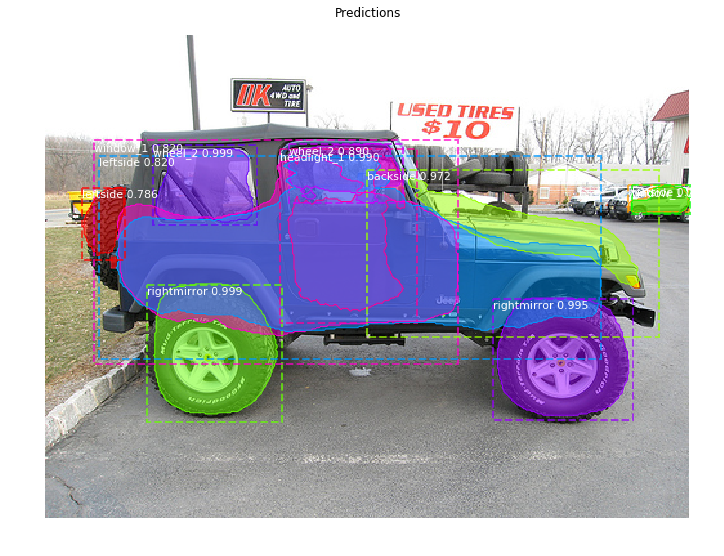

In [48]:
#select an image
img = dataset_val.load_image(4)
result = model.detect([img])[0]
ax = make_subplot(rows=1, size=12)

img = visualize.display_instances(img, result['rois'], result['masks'], result['class_ids'], 
                            dataset_train.class_names, colors, result['scores'], ax=ax,
                            title="Predictions")